In [1]:
import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.3



In [2]:
# unit
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9

In [3]:
wavelength = 0.550 * µm
size = 5 * mm
N = 200  # pixel number
f = 10 * mm
z = 9.999 * mm

In [4]:
F = sl.PlaneWave(wavelength, size, N)
L = sl.Lens.new_lens(size, f)

In [5]:
F = sl.circle_aperture(F)
F, F_3d = sl.near_field_propagation(F, L, z, return_3d_field=True, coord='spherical')

====== Padding to same size ======
100.00% (250 / 250) [200 =&gt; 5200]
====== Interpolating to same pixels ======
100.00% (250 / 250) [5200 =&gt; 384]

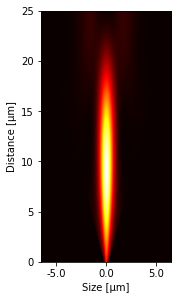

In [6]:
slpl.plot_vertical_intensity(F_3d, norm_type=1)